In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

In [3]:
telcom = pd.read_csv("D:/dataset/customer_churn.csv")
#first few rows
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telcom.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
telcom.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [7]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
np.unique(telcom['TotalCharges'])

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [9]:
telcom['TotalCharges'] = telcom['TotalCharges'].replace(" ",np.nan)

In [10]:
telcom['TotalCharges'] = telcom['TotalCharges'].astype('float')

In [11]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
telcom = telcom.dropna()

In [13]:
telcom.shape

(7032, 21)

In [72]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [73]:
5163/1869

2.7624398073836276

In [14]:
features = telcom.drop(['Churn','customerID'],axis=1)

In [15]:
target = telcom['Churn']

In [16]:
features.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [17]:
features_dummy = pd.get_dummies(features)

In [18]:
features_dummy.shape

(7032, 45)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(features_dummy,target,test_size=0.3,random_state=42)

In [20]:
rfm = RandomForestClassifier()

In [21]:
rfm.fit(x_train,y_train)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
prediction = rfm.predict(x_test)

In [23]:
pd.crosstab(y_test,prediction)

col_0    No  Yes
Churn           
No     1384  165
Yes     319  242

In [24]:
rfm.score(x_train,y_train)

0.9825274278748476

In [25]:
rfm.score(x_test,y_test)

0.7706161137440758

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85      1549
         Yes       0.59      0.43      0.50       561

    accuracy                           0.77      2110
   macro avg       0.70      0.66      0.68      2110
weighted avg       0.75      0.77      0.76      2110



In [27]:
RandomForestClassifier?

In [30]:
from sklearn.tree import plot_tree

In [34]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [36]:
rfm.estimators_[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1953486449, splitter='best')

In [38]:
dotdata = export_graphviz(rfm.estimators_[1],
                            out_file=None,
                            rounded=True,
                            proportion = False,
                            feature_names = x_test.columns.tolist(), 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True)
    # convert the dot into graph
    # For that you should have Graphiz installed in your machine
graph = pydotplus.graph_from_dot_data(dotdata)
Image(graph.create_png())
graph.write_png("customer_churn.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.42647 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.42647 to fit



True

In [39]:
min_sample_split = range(100,200,20)
min_sample_leaf = range(50,100,10)
max_depth = range(10,20,2)
max_features = [0.5,0.6,0.7,0.8,1]

In [40]:
param_grid = {'max_depth':max_depth,'min_samples_split':min_sample_split,'min_samples_leaf':min_sample_leaf,'max_features':max_features}

In [41]:
param_grid

{'max_depth': range(10, 20, 2),
 'min_samples_split': range(100, 200, 20),
 'min_samples_leaf': range(50, 100, 10),
 'max_features': [0.5, 0.6, 0.7, 0.8, 1]}

In [42]:
rfm_grid = RandomForestClassifier()

In [44]:
grid = GridSearchCV(rfm_grid,param_grid=param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=10)

In [45]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.821, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.818, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.3s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.818, test=0.792), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.792), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.818, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.825), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.817, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.816, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.808, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.804, test=0.820), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.806), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.822), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.798), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.820), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.796), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.806, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.796), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.795), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.783), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.815, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.806, test=0.820), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.804), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.818), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.807), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.790), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.806, test=0.825), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160 

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.803), total=   0.2s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160 

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.804, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.782), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.805, test=0.808), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.802, test=0.810), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.809), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.798), total=   0.1s

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.804, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.803, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.808), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.802), total=   0.2s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.785), total=   0.3s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.801), total=   0.3s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.800), total=   0.2s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.819, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.816, test=0.783), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.807), total=   0.2s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.803), total=   0.2s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.807, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.809), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.827), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.811), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.809, test=0.811), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.781), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.829), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.794), total=   0.2s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.778), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.782), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.814, test=0.809), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.802, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.802, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.817, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.777), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.804, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.802, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.815, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.802, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.818, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.826), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.782), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.819, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.780), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.824), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.814), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.817, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.822), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.817, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.815, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.817, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.806, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.804, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.805, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.814, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.808), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.828), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.805, test=0.820), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.818, test=0.783), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.805, test=0.812), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.818, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.806), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.818), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.822), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.811), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.818, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.807, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.817, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.817, test=0.804), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.809), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.818, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.783), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.807), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.811), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.792), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.2s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.813), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.806, test=0.805), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.818), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.816), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.784), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.793), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.822), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.816, test=0.782), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.821), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.816, test=0.786), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.789), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.798), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.779), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.769, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.780, test=0.772), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.783, test=0.769), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.780, test=0.772), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.773, test=0.783), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.772, test=0.772), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.769, test=0.766), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.774, test=0.759), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.794, test=0.790), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.771, test=0.789), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.763, test=0.760), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.765, test=0.756), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.783, test=0.763), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.767, test=0.771), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.771), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.773, test=0.768), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.761, test=0.762), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.775, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.772, test=0.774), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.764, test=0.774), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.755, test=0.747), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.750, test=0.746), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.772, test=0.752), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.774, test=0.767), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.769, test=0.777), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.744, test=0.744), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.761, test=0.773), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.783, test=0.762), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.763, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.750, test=0.750), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.769, test=0.763), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.769, test=0.764), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.780, test=0.766), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.776, test=0.767), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.761, test=0.775), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.753, test=0.742), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.769, test=0.768), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.771, test=0.749), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.759, test=0.761), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.749, test=0.751), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.764, test=0.751), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.759, test=0.760), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.766, test=0.761), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.765, test=0.757), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.758, test=0.763), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.759, test=0.751), total=   0.0s


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.771, test=0.770), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.771, test=0.751), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.761, test=0.763), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.767, test=0.775), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.751, test=0.747), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.760, test=0.765), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.772, test=0.761), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.745, test=0.744), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.767, test=0.779), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.761, test=0.743), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.747, test=0.744), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.783, test=0.762), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.773, test=0.772), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.756, test=0.755), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.755, test=0.746), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.765, test=0.777), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.763, test=0.755), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.761, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.744, test=0.755), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.750, test=0.749), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.766, test=0.762), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.773, test=0.748), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.751, test=0.749), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.753, test=0.768), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.771, test=0.757), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.771, test=0.762), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.755, test=0.743), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.763, test=0.767), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.768, test=0.782), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.766, test=0.766), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.761, test=0.757), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.773, test=0.762), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.767, test=0.769), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.765, test=0.773), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.745, test=0.741), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.756, test=0.746), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.766, test=0.749), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.751, test=0.749), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.756, test=0.759), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.758, test=0.744), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.761, test=0.769), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.751, test=0.742), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.765, test=0.763), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.764, test=0.781), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.750, test=0.746), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.765, test=0.773), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.772, test=0.763), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.752, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.754, test=0.757), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.754, test=0.743), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.769, test=0.777), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.741), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.742, test=0.742), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.757), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.772, test=0.761), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.744, test=0.743), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.775, test=0.760), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.734, test=0.735), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.742, test=0.748), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.748, test=0.740), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.755, test=0.757), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.752, test=0.752), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.755, test=0.756), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.753, test=0.771), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.743, test=0.737), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.746, test=0.750), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.745, test=0.740), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.756, test=0.745), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.741, test=0.740), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.748, test=0.746), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.744, test=0.742), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.773, test=0.750), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.748, test=0.744), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.745, test=0.752), total=   0.1s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.750, test=0.743), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.754, test=0.748), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.754, test=0.751), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.744, test=0.745), total=   0.0s
[CV] max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=10, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.748, test=0.757), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.817, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.824), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.806, test=0.779), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.827), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.825), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.814, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.817, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.809, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.814, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.804, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.781), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.805, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.828), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.805, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.815, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.804, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.813, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.804, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.822), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.815, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.804, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.810, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.822), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.824), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.806, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.809), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.815, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.816, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.818, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.805, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.823), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.806, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.804, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.777), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.823), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.821), total=   0.2s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.806, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.780), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.804, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.797), total=   0.2s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180 

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV]  max_depth=12, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.824), total=   0.2s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.810), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.803, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.804, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.782), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.804, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.800, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.804, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.802, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.812), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.819, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.810, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.810), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.807, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.818, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.809), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.782), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.816, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.817, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.817, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.814, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.814, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.805, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.804, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.823), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.809), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.806, test=0.809), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.814, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.808), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.781), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.814, test=0.786), total=   0.2s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.815), total=   0.2s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.803, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.824), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.780), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.819, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.810, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.792), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.817, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.793), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.811), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.815), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.807, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.806, test=0.820), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.815, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.821), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.782), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.818), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.812), total=   0.2s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.810), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.806, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.822), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.805, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.815, test=0.791), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.804, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.813), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.807), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.810), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.784), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.816), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.767, test=0.758), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.776, test=0.781), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.785, test=0.768), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.762, test=0.756), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.775, test=0.783), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.764, test=0.757), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.764, test=0.762), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.770, test=0.748), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.751, test=0.746), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.768, test=0.782), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.761), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.774, test=0.765), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.773, test=0.758), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.775, test=0.773), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.747, test=0.754), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.770, test=0.757), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.773, test=0.763), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.765, test=0.759), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.770, test=0.764), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.776, test=0.788), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.774, test=0.782), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.753, test=0.746), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.775, test=0.760), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.775, test=0.771), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.766, test=0.777), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.764, test=0.757), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.756, test=0.744), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.760, test=0.750), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.768, test=0.772), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.768, test=0.786), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.779, test=0.771), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.763, test=0.760), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.782, test=0.764), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.777, test=0.766), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.761, test=0.767), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.743, test=0.744), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.766, test=0.766), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.775, test=0.759), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.767, test=0.768), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.760, test=0.779), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.776, test=0.758), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.786, test=0.782), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.780, test=0.749), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.766, test=0.757), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.755, test=0.771), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.762, test=0.758), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.773, test=0.771), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.772, test=0.756), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.766, test=0.765), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.768, test=0.770), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.757, test=0.746), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.757, test=0.761), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.776, test=0.762), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.763, test=0.757), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.765, test=0.774), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.760, test=0.756), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.768, test=0.763), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.754, test=0.742), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.771, test=0.761), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.755, test=0.765), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.771, test=0.765), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.746, test=0.752), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.765, test=0.746), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.762, test=0.766), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.759, test=0.767), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.765, test=0.753), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.764, test=0.771), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.777, test=0.759), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.737, test=0.734), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.756, test=0.761), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.769, test=0.770), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.752, test=0.738), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.761, test=0.749), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.770, test=0.769), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.767, test=0.783), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.734, test=0.734), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.755, test=0.750), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.746, test=0.736), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.765, test=0.751), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.768, test=0.778), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.751, test=0.740), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.744, test=0.750), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.767, test=0.755), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.750, test=0.741), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.756, test=0.763), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.748, test=0.743), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.758, test=0.753), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.749, test=0.741), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.765, test=0.760), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.742, test=0.747), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.771, test=0.763), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.769, test=0.764), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.779, test=0.755), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.744, test=0.737), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.757, test=0.768), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.754, test=0.739), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.764, test=0.760), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.752, test=0.747), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.754, test=0.745), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.758), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.746, test=0.744), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.740, test=0.739), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.761, test=0.756), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.749, test=0.749), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.737, test=0.738), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.753, test=0.745), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.768, test=0.774), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.756, test=0.743), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.762, test=0.760), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.768, test=0.780), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.750, test=0.747), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.761, test=0.757), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.751, test=0.745), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.747, test=0.739), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.747, test=0.761), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.745, test=0.741), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.764, test=0.764), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.754, test=0.746), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.735, test=0.738), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.774, test=0.787), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.758, test=0.751), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.763, test=0.763), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.753, test=0.748), total=   0.0s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.754, test=0.753), total=   0.1s
[CV] max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=12, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.741, test=0.757), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.819, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.822), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.782), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.805, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.817, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.785), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.806, test=0.813), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.805, test=0.813), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.815, test=0.781), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.804, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.807, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.824), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.784), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.806, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.801, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.802, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.814, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.804, test=0.811), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.802, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.805, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.784), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.803, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.803, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.819, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.809, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.819, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.822), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.781), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.811), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.811), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.809, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.808, test=0.825), total=   0.2s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.808, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.824), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.815, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.810), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.806, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.804, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.781), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.803, test=0.790), total=   0.2s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.804, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.782), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.813, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.781), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.823), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.804, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.810, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.819, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.818, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.811, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.810), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.817, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.816, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.810), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.817, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.782), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.779), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.806, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.816, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.816, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.815, test=0.787), total=   0.2s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.817, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.822), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.805, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.809), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.816, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.813, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.801, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.809, test=0.812), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.824), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.818, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.778), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.808, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.781), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.804, test=0.823), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.813, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.819, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.817, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.800), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.801), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.806, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.817, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.807), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.779), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.814, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.814, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.823), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.783), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.821), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.791), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.805), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.815, test=0.792), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.811), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.816, test=0.806), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.792), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.792), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.815), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.803), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.805, test=0.820), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.785), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.813), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.813, test=0.793), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.800), total=   0.2s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.797), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.808), total=   0.1s
[CV] max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.783, test=0.771), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.771, test=0.770), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.781, test=0.756), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.782, test=0.771), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.774, test=0.776), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.775, test=0.765), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.773, test=0.763), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.777, test=0.761), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.783, test=0.770), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.769, test=0.785), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.767, test=0.758), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.770), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.751, test=0.734), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.769, test=0.772), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.773, test=0.786), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.769, test=0.764), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.763, test=0.765), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.778, test=0.770), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.770, test=0.766), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.774, test=0.780), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.780, test=0.769), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.755, test=0.753), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.776, test=0.770), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.774, test=0.777), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.775, test=0.787), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.780, test=0.781), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.764, test=0.763), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.746, test=0.748), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.758, test=0.756), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.759, test=0.782), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.766, test=0.750), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.762, test=0.763), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.773, test=0.750), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.768, test=0.754), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.763, test=0.768), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.764, test=0.758), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.745, test=0.747), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.774, test=0.765), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.772, test=0.768), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.745, test=0.743), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.765, test=0.758), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160 

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.758, test=0.753), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.776, test=0.759), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.772, test=0.775), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.765, test=0.784), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.776, test=0.768), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.767, test=0.766), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.752, test=0.741), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.777, test=0.770), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.758, test=0.771), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.755, test=0.750), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.764, test=0.772), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.760, test=0.751), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.752, test=0.745), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.773, test=0.782), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.757, test=0.761), total=   0.0s


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.752, test=0.754), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.750, test=0.744), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.768, test=0.766), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.765, test=0.777), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.776, test=0.770), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.766, test=0.759), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.756, test=0.750), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.774, test=0.764), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.771, test=0.784), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.774, test=0.762), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.776, test=0.780), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.760, test=0.748), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.759, test=0.754), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.757, test=0.768), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.767, test=0.759), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.751, test=0.751), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.753, test=0.741), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.759, test=0.761), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.760, test=0.766), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.768, test=0.764), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.758, test=0.764), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.752, test=0.751), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.760, test=0.750), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.745, test=0.749), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.741, test=0.738), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.753, test=0.753), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.745, test=0.746), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.758, test=0.769), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.752, test=0.765), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.755, test=0.744), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.745, test=0.748), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.783, test=0.772), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.766, test=0.759), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.765, test=0.775), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.766, test=0.753), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.740, test=0.734), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.752, test=0.746), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.782, test=0.774), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.762, test=0.773), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.756, test=0.747), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.763, test=0.760), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.759, test=0.763), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.748), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.750, test=0.766), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.764, test=0.757), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.752, test=0.750), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.742, test=0.744), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.754, test=0.745), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.743, test=0.751), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.735, test=0.734), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.744, test=0.746), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.745, test=0.745), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.768, test=0.758), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.743, test=0.745), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.749, test=0.745), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.746, test=0.746), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.734, test=0.734), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.756, test=0.739), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.755, test=0.753), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.767, test=0.761), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.743, test=0.744), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.750, test=0.741), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.756, test=0.743), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.750, test=0.758), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.774, test=0.764), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.744, test=0.737), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.758, test=0.755), total=   0.1s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.762, test=0.754), total=   0.0s
[CV] max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=14, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.734, test=0.734), total=   0.0s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.810), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.810), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.776), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.782), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.825), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.808, test=0.822), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.802, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.822), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.812), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.804, test=0.824), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.804, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.803, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.809), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.783), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.802, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.805, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.802, test=0.812), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.802, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.781), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.807), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.807), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.822, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.820, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.801), total=   0.2s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.822), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.824), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.821, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.817, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.818, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.824), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.780), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.809), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.805, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.796), total=   0.2s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.825), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.814, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.818, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.811), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.816, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.807), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.811), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.806), total=   0.2s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.803, test=0.812), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.805, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.824), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.807, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.778), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.803), total=   0.2s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.822), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.803, test=0.795), total=   0.2s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.812), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.782), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.818, test=0.802), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.823), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.819, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.779), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.810, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.802), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.802), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.806, test=0.799), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.815, test=0.792), total=   0.2s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.782), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.815, test=0.782), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.811), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.811), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.815, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.816, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.806, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.806, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.809), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.814), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.803, test=0.820), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.791), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.789), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.803, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.819, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.792), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.807), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.811), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.807), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.816), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.790), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.809, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.818, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.815, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.819, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.807, test=0.820), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.786), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.796), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.805, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.812), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.782), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.808), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.815, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.783), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.817), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.781), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.787), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.811, test=0.805), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.818), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.821), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.804, test=0.815), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.811, test=0.785), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.795), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.804, test=0.822), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.803, test=0.802), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.804), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.779, test=0.769), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.769, test=0.766), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.780, test=0.764), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.781, test=0.771), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.763, test=0.776), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.767, test=0.756), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.773, test=0.761), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.766, test=0.751), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.767, test=0.761), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.762, test=0.757), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.776, test=0.771), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.776, test=0.768), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.777, test=0.757), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.787, test=0.783), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.785), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.783, test=0.773), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.776, test=0.777), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.766, test=0.749), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.771, test=0.772), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.762, test=0.772), total=   0.2s


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.773, test=0.768), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.766, test=0.753), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.779, test=0.774), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.781, test=0.784), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.769, test=0.778), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.773, test=0.768), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.761, test=0.759), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.785, test=0.763), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.776, test=0.757), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.762, test=0.766), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.760, test=0.753), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.775, test=0.771), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.747, test=0.748), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.768, test=0.760), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.754, test=0.759), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.772, test=0.771), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.780, test=0.776), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.772, test=0.755), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.771, test=0.760), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.749, test=0.757), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.771, test=0.768), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.756, test=0.758), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.763, test=0.749), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.757, test=0.748), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.753, test=0.769), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.766, test=0.758), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.754, test=0.751), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.753, test=0.745), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.759, test=0.755), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.753, test=0.761), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.769, test=0.758), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.760, test=0.769), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.763, test=0.756), total=   0.1s


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.756, test=0.747), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.755, test=0.771), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.736, test=0.736), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.772, test=0.763), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.782, test=0.763), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.754, test=0.752), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.769, test=0.773), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.754, test=0.748), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.770, test=0.760), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.751, test=0.749), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.755, test=0.743), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.778, test=0.789), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.740, test=0.740), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.771, test=0.769), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160 

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.782, test=0.769), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.778, test=0.768), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.757, test=0.765), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.770, test=0.756), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.757, test=0.752), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.741, test=0.734), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.765, test=0.753), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.764, test=0.767), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.747, test=0.739), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.743, test=0.739), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.781, test=0.774), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.764, test=0.760), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.754, test=0.768), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.762, test=0.751), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.760, test=0.750), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.762, test=0.745), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.761, test=0.755), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.745, test=0.748), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.766, test=0.760), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.753, test=0.754), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.749, test=0.734), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.749, test=0.745), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.766, test=0.771), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.759, test=0.756), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.757, test=0.756), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.750, test=0.744), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.758, test=0.756), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.753, test=0.766), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.758, test=0.751), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.764, test=0.768), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.740), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.740, test=0.739), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.750, test=0.761), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.764, test=0.752), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.765, test=0.758), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.754, test=0.747), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.752, test=0.739), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.736, test=0.736), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.748, test=0.744), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.746, test=0.748), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.739, test=0.736), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.746, test=0.746), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.758, test=0.766), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.754, test=0.745), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.763, test=0.758), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.754, test=0.746), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.763, test=0.752), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.753, test=0.751), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.745, test=0.736), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.750, test=0.754), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.769, test=0.754), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.772, test=0.764), total=   0.1s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.745, test=0.754), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_le

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.736, test=0.737), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.740, test=0.739), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.744, test=0.735), total=   0.0s
[CV] max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=16, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.750, test=0.754), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.817, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.818, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=100, score=(train=0.810, test=0.808), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.795), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.814, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.802), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=140, score=(train=0.807, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.816, test=0.786), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.806), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=160, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.816, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.822), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.790), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.809), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.818, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.814, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.817, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.817, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=160, score=(train=0.808, test=0.823), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.814, test=0.780), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.809, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.814, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=100, score=(train=0.808, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.809, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=140, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.814, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.816), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=100, score=(train=0.805, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.805, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.807, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=120, score=(train=0.806, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.815, test=0.780), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.782), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.813, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=160, score=(train=0.809, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.805, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.806, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.805, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=120, score=(train=0.804, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.810, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.805, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=140, score=(train=0.804, test=0.816), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.816), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.791), total=   0.2s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.803, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.5, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.818, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=120, score=(train=0.811, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.780), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.816, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=140, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.822), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.811, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=50, min_samples_split=180, score=(train=0.810, test=0.822), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=100, score=(train=0.808, test=0.821), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.808, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=120, score=(train=0.807, test=0.823), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.797), total=   0.2s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.818, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.816), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.817, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=60, min_samples_split=180, score=(train=0.808, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=100, score=(train=0.805, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.808, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=70, min_samples_split=180, score=(train=0.806, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.815, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.805, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=100, score=(train=0.805, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=120, score=(train=0.805, test=0.823), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.811, test=0.803), total=   0.2s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=160, score=(train=0.804, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.806, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=80, min_samples_split=180, score=(train=0.808, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.812, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=160, score=(train=0.805, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.814, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.6, min_samples_leaf=90, min_samples_split=180, score=(train=0.805, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.814, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.824), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.819, test=0.780), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.815, test=0.803), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.815), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.787), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=140, score=(train=0.808, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.818, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=160, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.815, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.814, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=100, score=(train=0.809, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.816, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.814, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=120, score=(train=0.809, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.808), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.815, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.816, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.814, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.817, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.812, test=0.809), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.809, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.819, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=100, score=(train=0.805, test=0.824), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.808, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.811, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.806, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.816, test=0.790), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=140, score=(train=0.813, test=0.822), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.815, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=160, score=(train=0.810, test=0.826), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.813, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=70, min_samples_split=180, score=(train=0.805, test=0.824), total=   0.2s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.811, test=0.811), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=100, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.815, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.816), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.806, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.815, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=140, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.816, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=160, score=(train=0.806, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.815, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.807, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=100, score=(train=0.805, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.809, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=120, score=(train=0.807, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=160, score=(train=0.807, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.811, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.7, min_samples_leaf=90, min_samples_split=180, score=(train=0.806, test=0.824), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.820, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.815, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=100, score=(train=0.813, test=0.811), total=   0.2s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.813, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.816, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.817, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=120, score=(train=0.812, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.815, test=0.778), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.813, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=140, score=(train=0.812, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.814, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=160, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.809, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.813, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.814, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=50, min_samples_split=180, score=(train=0.806, test=0.821), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.812, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.820, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.816, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.817, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=100, score=(train=0.810, test=0.820), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.782), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=120, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.812, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.813, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.811, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.816, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=140, score=(train=0.809, test=0.821), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.816, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.811, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.815, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=160, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.812, test=0.807), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.816, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.807, test=0.794), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.811, test=0.806), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=60, min_samples_split=180, score=(train=0.810, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.813, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.782), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.812, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=100, score=(train=0.811, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.816, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.813, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=120, score=(train=0.807, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.812, test=0.791), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.814, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.811, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=140, score=(train=0.808, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.812, test=0.785), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.813, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=160, score=(train=0.808, test=0.819), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.814, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.807, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.812, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=70, min_samples_split=180, score=(train=0.810, test=0.825), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.808, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.808), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.813, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=100, score=(train=0.807, test=0.811), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.809, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.810, test=0.787), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.811, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.813, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=120, score=(train=0.808, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.806, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.812, test=0.786), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.805), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.807, test=0.802), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=140, score=(train=0.805, test=0.818), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.808, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.812, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=160, score=(train=0.811, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.792), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.812, test=0.810), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.810, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=80, min_samples_split=180, score=(train=0.809, test=0.817), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.810, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.782), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.813, test=0.803), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.807, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=100, score=(train=0.809, test=0.808), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.811, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.806, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.810, test=0.797), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=120, score=(train=0.808, test=0.812), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.804), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.811, test=0.788), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.809, test=0.793), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.808, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=140, score=(train=0.806, test=0.814), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.810, test=0.784), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.812, test=0.800), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.808, test=0.798), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=160, score=(train=0.806, test=0.809), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.799), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.814, test=0.790), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.809, test=0.795), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.801), total=   0.1s
[CV] max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=0.8, min_samples_leaf=90, min_samples_split=180, score=(train=0.807, test=0.813), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.777, test=0.776), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.777, test=0.776), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.781, test=0.771), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.782, test=0.775), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=100, score=(train=0.759, test=0.767), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.779, test=0.765), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.767, test=0.754), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.775, test=0.754), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.773, test=0.769), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=120, score=(train=0.764, test=0.773), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.776, test=0.762), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.779), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.769, test=0.758), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.791, test=0.796), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=140, score=(train=0.771, test=0.782), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.774, test=0.764), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.779, test=0.776), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.777, test=0.766), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.759, test=0.761), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=160, score=(train=0.748, test=0.757), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.747, test=0.740), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.746, test=0.743), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.763, test=0.761), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.753, test=0.753), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=50, min_samples_split=180, score=(train=0.769, test=0.782), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.768, test=0.765), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.760, test=0.760), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.766, test=0.755), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.779, test=0.763), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=100, score=(train=0.750, test=0.765), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.774, test=0.765), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.761, test=0.766), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.773, test=0.763), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.763, test=0.762), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=120, score=(train=0.769, test=0.778), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.763, test=0.760), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.758, test=0.757), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.769, test=0.756), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.768, test=0.764), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=140, score=(train=0.760, test=0.774), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.772, test=0.768), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.765, test=0.763), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.770, test=0.749), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.766, test=0.762), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=160, score=(train=0.744, test=0.758), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.760, test=0.751), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.768, test=0.772), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.781, test=0.764), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.776, test=0.772), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=60, min_samples_split=180, score=(train=0.750, test=0.764), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.764, test=0.751), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.752, test=0.760), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.771, test=0.753), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.765, test=0.757), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=100, score=(train=0.745, test=0.761), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.771, test=0.766), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.764, test=0.768), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.751, test=0.744), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.768, test=0.766), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=120, score=(train=0.773, test=0.789), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.767, test=0.765), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.776, test=0.771), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.749, test=0.737), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.761, test=0.751), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=140, score=(train=0.768, test=0.786), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.771, test=0.770), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.760, test=0.763), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.736, test=0.735), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.772, test=0.765), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=160, score=(train=0.769, test=0.782), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.759, test=0.754), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.767, test=0.769), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.757, test=0.744), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.775, test=0.772), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=70, min_samples_split=180, score=(train=0.776, test=0.787), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.738, test=0.735), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.759, test=0.755), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.762, test=0.754), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.761, test=0.748), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=100, score=(train=0.750, test=0.757), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.759, test=0.745), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.774, test=0.771), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.763, test=0.743), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.754, test=0.752), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=120, score=(train=0.777, test=0.783), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.770, test=0.765), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.753, test=0.753), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.750, test=0.743), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.758, test=0.754), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=140, score=(train=0.741, test=0.743), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.744, test=0.736), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.763, test=0.758), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.764, test=0.748), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.784, test=0.768), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=160, score=(train=0.750, test=0.759), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.760, test=0.746), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.752, test=0.753), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.752, test=0.748), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.751, test=0.752), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=80, min_samples_split=180, score=(train=0.760, test=0.766), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.747, test=0.739), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.756, test=0.762), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.749, test=0.744), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.745, test=0.745), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=100, score=(train=0.742, test=0.745), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.736, test=0.736), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.740, test=0.736), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.754, test=0.751), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.740, test=0.739), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=120, score=(train=0.734, test=0.734), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.766, test=0.758), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.771, test=0.766), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.755, test=0.754), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.764, test=0.753), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=140, score=(train=0.760, test=0.768), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.754, test=0.749), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.754, test=0.756), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.763, test=0.749), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.753, test=0.748), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=160, score=(train=0.761, test=0.765), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.737, test=0.734), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.759, test=0.752), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.756, test=0.746), total=   0.0s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180 


C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.760, test=0.766), total=   0.1s
[CV] max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180 
[CV]  max_depth=18, max_features=1, min_samples_leaf=90, min_samples_split=180, score=(train=0.766, test=0.773), total=   0.0s


[Parallel(n_jobs=1)]: Done 3125 out of 3125 | elapsed:  6.0min finished
C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [46]:
grid.best_params_

{'max_depth': 18,
 'max_features': 0.6,
 'min_samples_leaf': 60,
 'min_samples_split': 120}

In [47]:
grid.best_score_

0.806989028850061

In [50]:
df = pd.DataFrame(grid.cv_results_)

In [51]:
df[df['params']==grid.best_params_]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
531       0.100006      0.006325            0.007        0.001549   

    param_max_depth param_max_features param_min_samples_leaf  \
531              18                0.6                     60   

    param_min_samples_split  \
531                     120   

                                                params  split0_test_score  \
531  {'max_depth': 18, 'max_features': 0.6, 'min_sa...           0.803046   

     ...  mean_test_score  std_test_score  rank_test_score  \
531  ...         0.806989         0.00888                1   

     split0_train_score  split1_train_score  split2_train_score  \
531            0.807976            0.815596            0.813818   

     split3_train_score  split4_train_score  mean_train_score  std_train_score  
531            0.815389            0.807312          0.812018          0.00363  

[1 rows x 24 columns]

In [52]:
prediction = grid.predict(x_test)

In [53]:
pd.crosstab(y_test,prediction)

col_0    No  Yes
Churn           
No     1405  144
Yes     294  267

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1549
         Yes       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [55]:
rfm_trees = RandomForestClassifier(max_depth= 18,
 max_features= 0.6,
 min_samples_leaf= 60,
 min_samples_split= 120,
 n_estimators = 100)

In [56]:
rfm_trees.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=18, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=60, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rfm_trees.score(x_train,y_train)

0.8167411621292158

In [58]:
rfm_trees.score(x_test,y_test)

0.7924170616113744

In [59]:
prediction = rfm_trees.predict(x_test)

In [60]:
pd.crosstab(y_test,prediction)

col_0    No  Yes
Churn           
No     1399  150
Yes     288  273

In [64]:
feature_importance = pd.DataFrame(rfm_trees.feature_importances_,index=x_test.columns.tolist(),columns=["Importances"])

In [67]:
feature_importance = feature_importance.sort_values(['Importances'],ascending=False)

In [68]:
feature_importance

Importances
Contract_Month-to-month                     0.346073
tenure                                      0.161649
OnlineSecurity_No                           0.123393
InternetService_Fiber optic                 0.088813
TotalCharges                                0.071435
MonthlyCharges                              0.070382
TechSupport_No                              0.037651
PaymentMethod_Electronic check              0.017781
InternetService_DSL                         0.014741
Contract_Two year                           0.010860
StreamingMovies_Yes                         0.004137
MultipleLines_No                            0.004110
Contract_One year                           0.003885
TechSupport_Yes                             0.003692
MultipleLines_Yes                           0.003289
SeniorCitizen                               0.002968
StreamingMovies_No                          0.002703
OnlineBackup_No                             0.002688
StreamingTV_Yes                             0.002454
PaperlessBilling_Yes                        0.002225
gender_Female                               0.002042
PhoneService_Yes                            0.001969
OnlineSecurity_Yes                          0.001929
gender_Male                                 0.001851
DeviceProtection_No internet service        0.001824
StreamingTV_No                              0.001668
DeviceProtection_No                         0.001363
PaymentMethod_Mailed check                  0.001333
InternetService_No                          0.001323
PhoneService_No                             0.001217
MultipleLines_No phone service              0.001161
PaperlessBilling_No                         0.001008
StreamingTV_No internet service             0.001001
PaymentMethod_Credit card (automatic)       0.000913
Partner_Yes                                 0.000731
TechSupport_No internet service             0.000577
OnlineBackup_Yes                            0.000477
OnlineBackup_No internet service            0.000468
DeviceProtection_Yes                        0.000433
Dependents_No                               0.000422
OnlineSecurity_No internet service          0.000418
Partner_No                                  0.000260
PaymentMethod_Bank transfer (automatic)     0.000250
Dependents_Yes                              0.000222
StreamingMovies_No internet service         0.000212

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

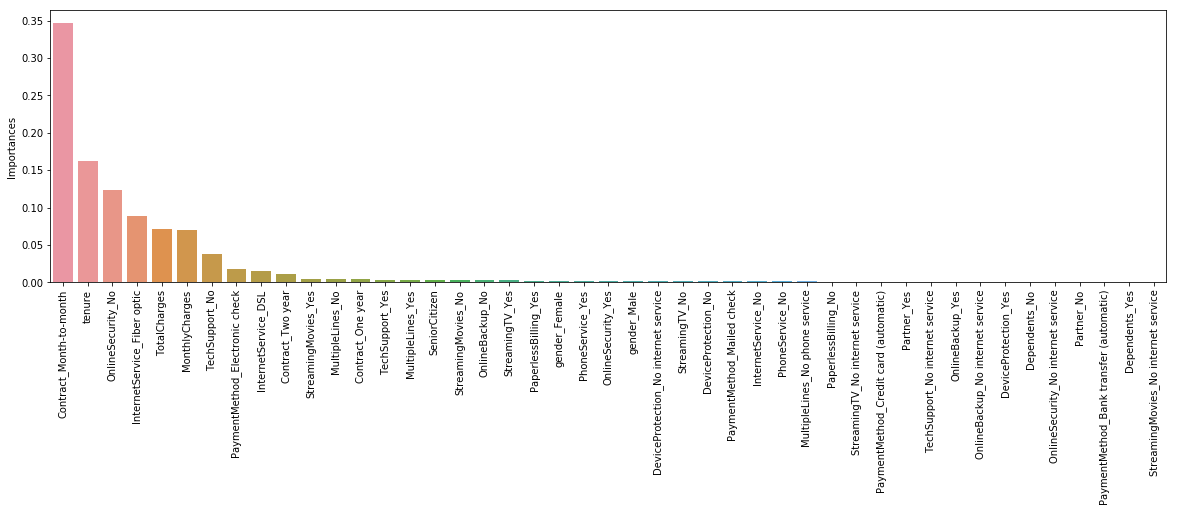

In [71]:
plt.figure(figsize=[20,5])
sns.barplot(x=feature_importance.index,y=feature_importance['Importances'])
plt.xticks(rotation=90)

In [ ]:
# Tried 2nd time

In [38]:
    from sklearn.tree import export_graphviz
    import pydotplus
    from IPython.display import Image
    dotdata = export_graphviz(estimated_tree[9],out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = x_test.columns.tolist(), 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True)
    # convert the dot into graph
    # For that you should have Graphiz installed in your machine
    graph = pydotplus.graph_from_dot_data(dotdata)
    Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.460806 to fit



In [55]:
df = pd.DataFrame(rfm.feature_importances_,index=x_test.columns.tolist(),columns=['Importance']).sort_values(['Importance'],ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

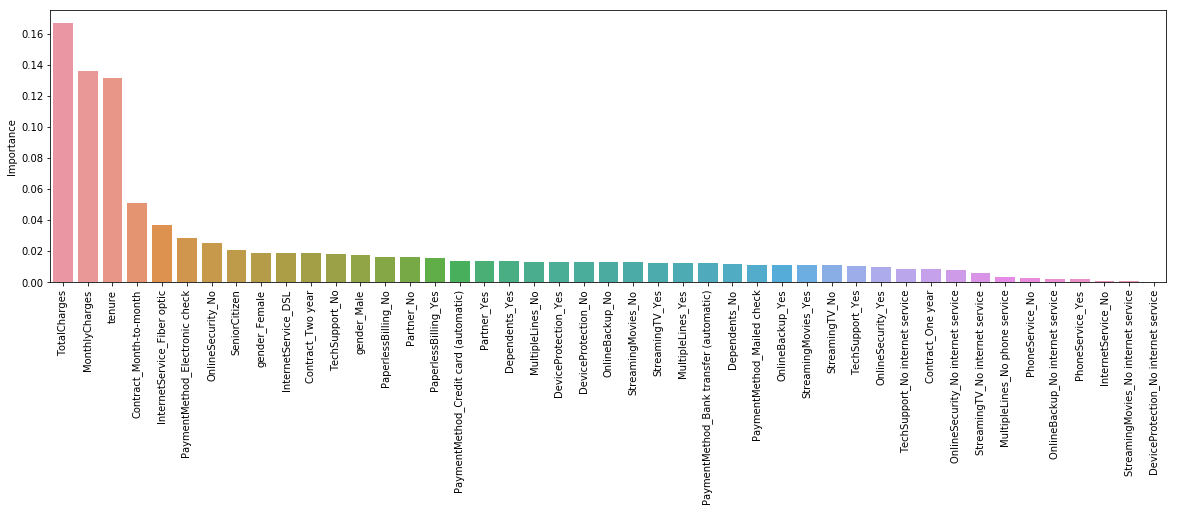

In [61]:
plt.figure(figsize=[20,5])
sns.barplot(x=df.index,y=df.Importance)
plt.xticks(rotation=90)

In [76]:
max_depth=range(10,20,2)
min_samples_split=range(10,100,10)
min_samples_leaf=range(5,50,5)
max_features=[0.5,0.6,0.8,1.0]

In [77]:
param_grid = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}

In [78]:
param_grid

{'max_depth': range(10, 20, 2),
 'min_samples_split': range(10, 100, 10),
 'min_samples_leaf': range(5, 50, 5),
 'max_features': [0.5, 0.6, 0.8, 1.0]}

In [79]:
grid = GridSearchCV(rfm,param_grid =param_grid,cv=5,scoring='accuracy',return_train_score=True)

In [80]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [81]:
grid.best_params_

{'max_depth': 14,
 'max_features': 1.0,
 'min_samples_leaf': 45,
 'min_samples_split': 10}

In [82]:
grid.best_score_

0.8086143843965867

In [83]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=45, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
df = pd.DataFrame(grid.cv_results_)

In [86]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.096606      0.013366           0.0054        0.000490   
1       0.097005      0.022083           0.0052        0.000400   
2       0.083205      0.002926           0.0064        0.001357   
3       0.081405      0.002059           0.0052        0.000400   
4       0.079605      0.000490           0.0052        0.000400   

  param_max_depth param_max_features param_min_samples_leaf  \
0              10                0.5                      5   
1              10                0.5                      5   
2              10                0.5                      5   
3              10                0.5                      5   
4              10                0.5                      5   

  param_min_samples_split                                             params  \
0                      10  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   
1                      20  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   
2                      30  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   
3                      40  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   
4                      50  {'max_depth': 10, 'max_features': 0.5, 'min_sa...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.798985  ...         0.793986        0.015111             1565   
1           0.801015  ...         0.794189        0.013969             1556   
2           0.802030  ...         0.798050        0.008528             1188   
3           0.801015  ...         0.797643        0.011477             1274   
4           0.801015  ...         0.798050        0.015416             1188   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.872746            0.871476            0.870714   
1            0.850902            0.857506            0.855728   
2            0.847854            0.848870            0.843790   
3            0.837186            0.836678            0.838456   
4            0.833884            0.840996            0.831598   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.871508            0.860371          0.869363         0.004543  
1            0.857288            0.849962          0.854277         0.003213  
2            0.846877            0.841330          0.845744         0.002786  
3            0.835957            0.833968          0.836449         0.001485  
4            0.829355            0.825336          0.832234         0.005211  

[5 rows x 24 columns]

In [88]:
df[df['params']==grid.best_params_]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
963       0.107806      0.001166            0.005    9.536743e-08   

    param_max_depth param_max_features param_min_samples_leaf  \
963              14                  1                     45   

    param_min_samples_split  \
963                      10   

                                                params  split0_test_score  \
963  {'max_depth': 14, 'max_features': 1.0, 'min_sa...           0.804061   

     ...  mean_test_score  std_test_score  rank_test_score  \
963  ...         0.808614        0.007174                1   

     split0_train_score  split1_train_score  split2_train_score  \
963            0.814834            0.818898            0.819914   

     split3_train_score  split4_train_score  mean_train_score  std_train_score  
963            0.817674             0.80985          0.816234         0.003617  

[1 rows x 24 columns]

In [75]:
# XGBoost Model
from xgboost import XGBClassifier

In [83]:
x_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [76]:
xgb = XGBClassifier()

In [77]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [78]:
prediction = xgb.predict(x_test)

In [79]:
pd.crosstab(y_test,prediction)

col_0    No  Yes
Churn           
No     1399  150
Yes     275  286

In [80]:
xgb.score(x_train,y_train)

0.8262901259650548

In [81]:
xgb.score(x_test,y_test)

0.7985781990521327

In [82]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1549
         Yes       0.66      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

